In [103]:
import pandas as pd 
import numpy as np
from  sklearn.compose import ColumnTransformer
from  sklearn.impute import SimpleImputer
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler


In [104]:
def insert_df_into_db(collection_name, df) -> None:
    from pymongo import MongoClient
    from dotenv import load_dotenv
    import os

    load_dotenv(dotenv_path="../.env")
    conn_str = os.getenv('CONN_STR')
    
    client = MongoClient(conn_str)
    db = client['PAI-Project']
    collection = db[collection_name]

    from json import loads, dumps

    documents = df.to_json(orient='records')
    parsed = loads(documents)
    collection.insert_many(parsed)

In [105]:
# Saves content of csv file to HealthData variable
HealthData= pd.read_csv('Mental_Health_Care_in_the_Last_4_Weeks.csv')
HealthData

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Time Period Start Date,Time Period End Date,Value,LowCI,HighCI,Confidence Interval,Quartile Range,Suppression Flag
0,Took Prescription Medication for Mental Health...,National Estimate,United States,United States,2,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,19.4,19.0,19.8,19.0 - 19.8,NaN,NaN
1,Took Prescription Medication for Mental Health...,By Age,United States,18 - 29 years,2,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,18.7,17.2,20.3,17.2 - 20.3,NaN,NaN
2,Took Prescription Medication for Mental Health...,By Age,United States,30 - 39 years,2,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,18.3,17.3,19.2,17.3 - 19.2,NaN,NaN
3,Took Prescription Medication for Mental Health...,By Age,United States,40 - 49 years,2,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,20.4,19.5,21.3,19.5 - 21.3,NaN,NaN
4,Took Prescription Medication for Mental Health...,By Age,United States,50 - 59 years,2,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,21.2,20.2,22.2,20.2 - 22.2,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10399,Needed Counseling or Therapy But Did Not Get I...,By State,Virginia,Virginia,3.4,45,"Apr 27 - May 9, 2022",04/27/2022,05/09/2022,10.1,7.1,13.8,7.1 - 13.8,9.6-11.3,NaN
10400,Needed Counseling or Therapy But Did Not Get I...,By State,Washington,Washington,3.4,45,"Apr 27 - May 9, 2022",04/27/2022,05/09/2022,14.8,12.5,17.4,12.5 - 17.4,13.0-20.8,NaN
10401,Needed Counseling or Therapy But Did Not Get I...,By State,West Virginia,West Virginia,3.4,45,"Apr 27 - May 9, 2022",04/27/2022,05/09/2022,9.8,6.6,13.8,6.6 - 13.8,9.6-11.3,NaN
10402,Needed Counseling or Therapy But Did Not Get I...,By State,Wisconsin,Wisconsin,3.4,45,"Apr 27 - May 9, 2022",04/27/2022,05/09/2022,11.6,8.5,15.3,8.5 - 15.3,11.4-12.9,NaN


In [106]:
# insert_df_into_db('TabularData', HealthData)

In [107]:
#  To get all  data type
HealthData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10404 entries, 0 to 10403
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Indicator               10404 non-null  object 
 1   Group                   10404 non-null  object 
 2   State                   10404 non-null  object 
 3   Subgroup                10404 non-null  object 
 4   Phase                   10404 non-null  object 
 5   Time Period             10404 non-null  int64  
 6   Time Period Label       10404 non-null  object 
 7   Time Period Start Date  10404 non-null  object 
 8   Time Period End Date    10404 non-null  object 
 9   Value                   9914 non-null   float64
 10  LowCI                   9914 non-null   float64
 11  HighCI                  9914 non-null   float64
 12  Confidence Interval     9914 non-null   object 
 13  Quartile Range          6732 non-null   object 
 14  Suppression Flag        22 non-null   

In [108]:
# To check dataset statistics
HealthData.describe()

,Time Period,Value,LowCI,HighCI,Suppression Flag
count,10404.000000,9914.000000,9914.000000,9914.000000,22.0
mean,28.134948,17.450736,14.771565,20.475661,1.0
std,11.040210,8.270565,7.659396,9.052521,0.0
min,1.000000,1.400000,0.800000,2.000000,1.0
25%,20.000000,10.300000,8.000000,12.900000,1.0
50%,29.000000,16.200000,13.900000,19.200000,1.0
75%,37.000000,24.000000,20.800000,27.400000,1.0
max,45.000000,62.900000,53.200000,71.900000,1.0


In [109]:
# Check for ? and replaces ? with NaN so 
# the system can see it as missing value
HealthData= HealthData.replace('?', np.nan)
HealthData.isnull().sum()



Indicator                     0
Group                         0
State                         0
Subgroup                      0
Phase                         0
Time Period                   0
Time Period Label             0
Time Period Start Date        0
Time Period End Date          0
Value                       490
LowCI                       490
HighCI                      490
Confidence Interval         490
Quartile Range             3672
Suppression Flag          10382
dtype: int64

In [110]:
HealthData.head()

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Time Period Start Date,Time Period End Date,Value,LowCI,HighCI,Confidence Interval,Quartile Range,Suppression Flag
0,Took Prescription Medication for Mental Health...,National Estimate,United States,United States,2,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,19.4,19.0,19.8,19.0 - 19.8,NaN,NaN
1,Took Prescription Medication for Mental Health...,By Age,United States,18 - 29 years,2,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,18.7,17.2,20.3,17.2 - 20.3,NaN,NaN
2,Took Prescription Medication for Mental Health...,By Age,United States,30 - 39 years,2,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,18.3,17.3,19.2,17.3 - 19.2,NaN,NaN
3,Took Prescription Medication for Mental Health...,By Age,United States,40 - 49 years,2,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,20.4,19.5,21.3,19.5 - 21.3,NaN,NaN
4,Took Prescription Medication for Mental Health...,By Age,United States,50 - 59 years,2,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,21.2,20.2,22.2,20.2 - 22.2,NaN,NaN


In [111]:
HealthData.drop(['Suppression Flag'], axis=1, inplace=True)

In [112]:
HealthData.drop(['Confidence Interval'], axis=1, inplace=True)

In [113]:
HealthData.drop(['Subgroup'], axis=1, inplace=True)

In [114]:

HealthData.drop(['Time Period Label'], axis=1, inplace=True)

In [115]:
HealthData.shape

(10404, 11)

Feature Quartile Range has range values that can not be interperted by the system to solve this, Quartile Range is slipt into low and high then dropped.

In [116]:
lows, highs = [], []

for data in HealthData['Quartile Range']:
    if isinstance(data, float) or "-" not in str(data):  # Check for NaN or no "-"
        lows.append(np.nan)
        highs.append(np.nan)
    else:
        
        try:
            low, high = data.split("-")
            low, high = float(low.strip()), float(high.strip())  # Strip spaces and convert
            lows.append(low)
            highs.append(high)
        except ValueError as e:  # Catch any unexpected errors
            print(f"Error processing '{data}': {e}")
            lows.append(np.nan)
            highs.append(np.nan)

HealthData['LowQR'] = lows
HealthData['HighQR'] = highs   

In [117]:
HealthData.drop(['Quartile Range'], axis=1, inplace=True)

Data collection and manipulation

In [118]:
# Define categorical and numerical features

numericalFeatures = ['Value','LowCI','HighCI','LowQR','HighQR']
others=['Group','State','Phase','Time Period','Time Period Start Date','Time Period End Date','Indicator']

# Create a preprocessor to handle missing values
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), numericalFeatures),
        
    ]
)

# Fit and transform the data
transformedData = preprocessor.fit_transform(HealthData)
studentDataCleaned = pd.DataFrame(data= transformedData, columns= numericalFeatures)
otherdf= HealthData[others].copy()
HealthDataCleaned = pd.concat([studentDataCleaned,otherdf], axis=1)
HealthDataCleaned.head()

,Value,LowCI,HighCI,LowQR,HighQR,Group,State,Phase,Time Period,Time Period Start Date,Time Period End Date,Indicator
0,19.4,19.0,19.8,15.570817,19.090103,National Estimate,United States,2,13,08/19/2020,08/31/2020,Took Prescription Medication for Mental Health...
1,18.7,17.2,20.3,15.570817,19.090103,By Age,United States,2,13,08/19/2020,08/31/2020,Took Prescription Medication for Mental Health...
2,18.3,17.3,19.2,15.570817,19.090103,By Age,United States,2,13,08/19/2020,08/31/2020,Took Prescription Medication for Mental Health...
3,20.4,19.5,21.3,15.570817,19.090103,By Age,United States,2,13,08/19/2020,08/31/2020,Took Prescription Medication for Mental Health...
4,21.2,20.2,22.2,15.570817,19.090103,By Age,United States,2,13,08/19/2020,08/31/2020,Took Prescription Medication for Mental Health...


In [119]:
HealthDataCleaned.shape

(10404, 12)

In [120]:
# insert_df_into_db('CleanedTabularData', HealthDataCleaned)

Add code to db

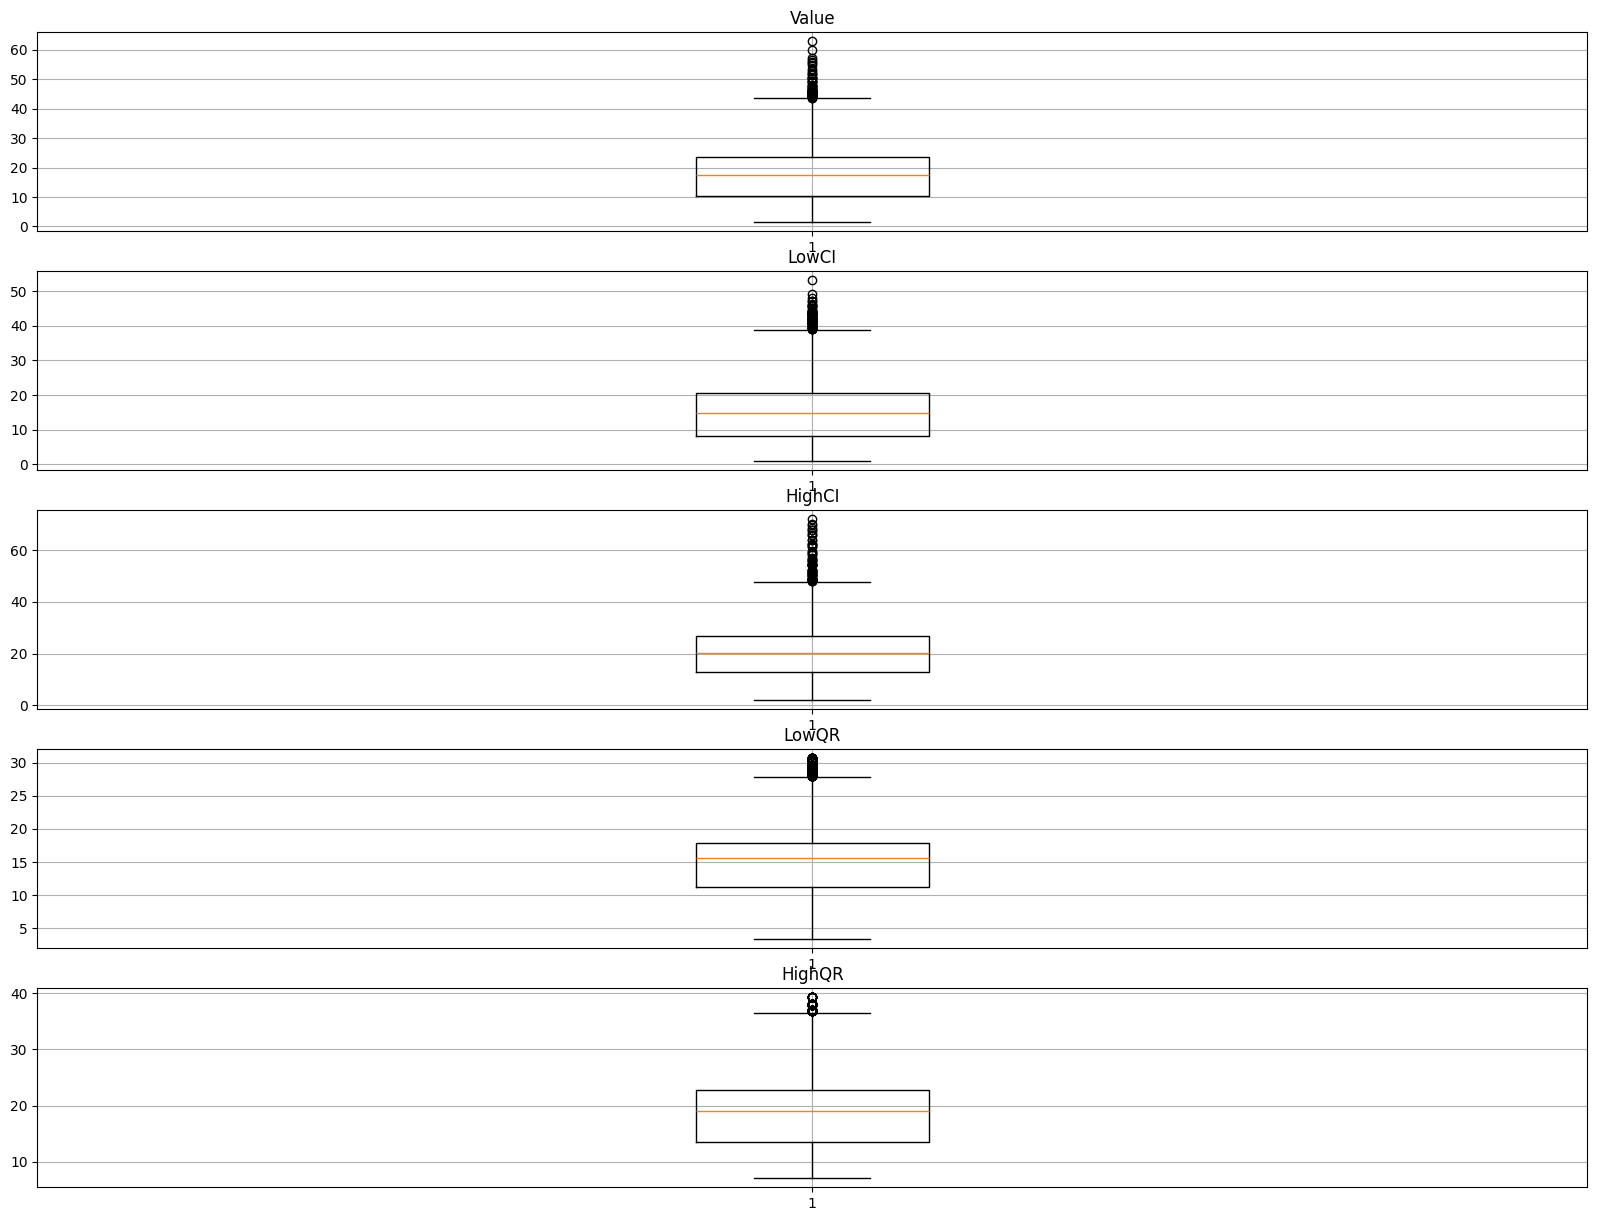

In [121]:
# Checking for outliers.
fig, ax = plt.subplots(5, figsize=(20, 15))
ax = ax.flatten()
for i in range(len(ax)):
    x = HealthDataCleaned[numericalFeatures[i]]
    ax[i].boxplot(x)
    ax[i].set_title(numericalFeatures[i])
    ax[i].grid(visible=True)
    
plt.show()

Removing of outliers


In [122]:
HealthDataCleaned = HealthDataCleaned[(HealthDataCleaned['Value'] < 59) & (HealthDataCleaned['LowCI'] < 59)]

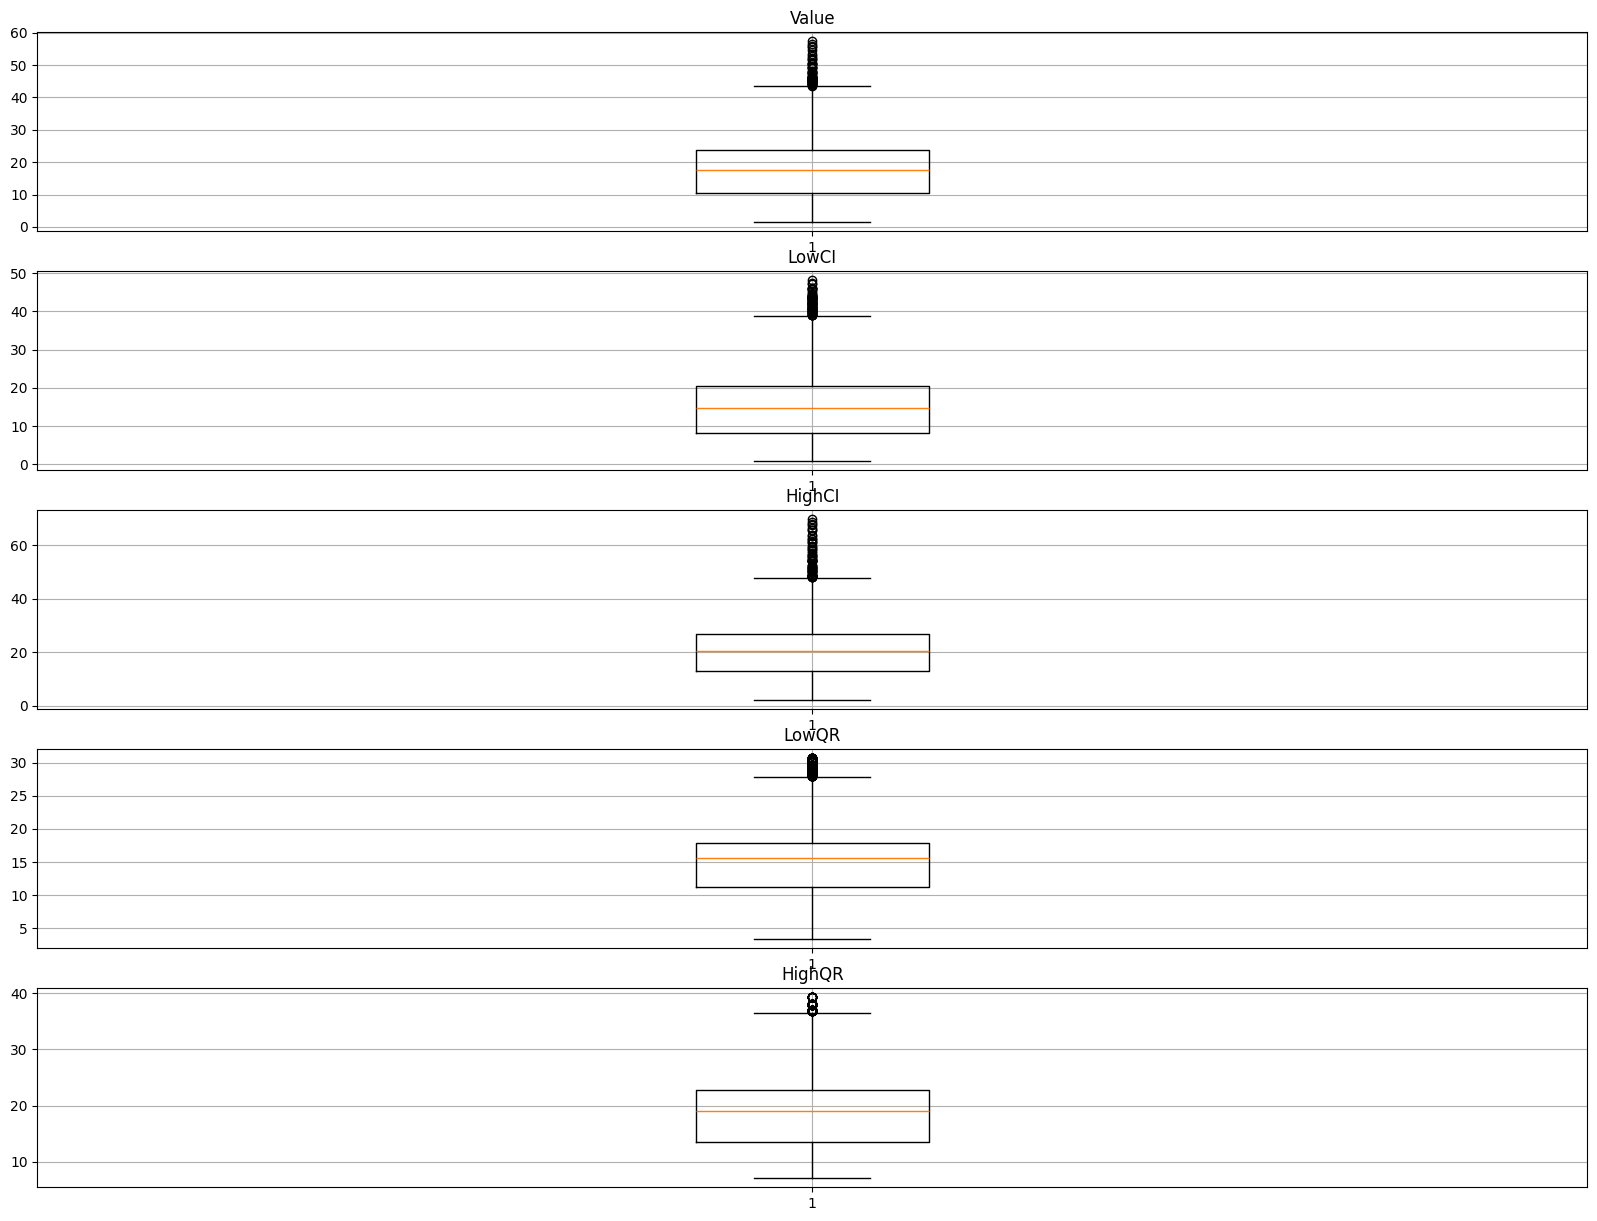

In [123]:
# Boxplot after removing outliers
fig, ax = plt.subplots(5, figsize=(20, 15))
ax = ax.flatten()
for i in range(len(ax)):
    x = HealthDataCleaned[numericalFeatures[i]]
    ax[i].boxplot(x)
    ax[i].set_title(numericalFeatures[i])
    ax[i].grid(visible=True)
    
plt.show()

Data visualisation

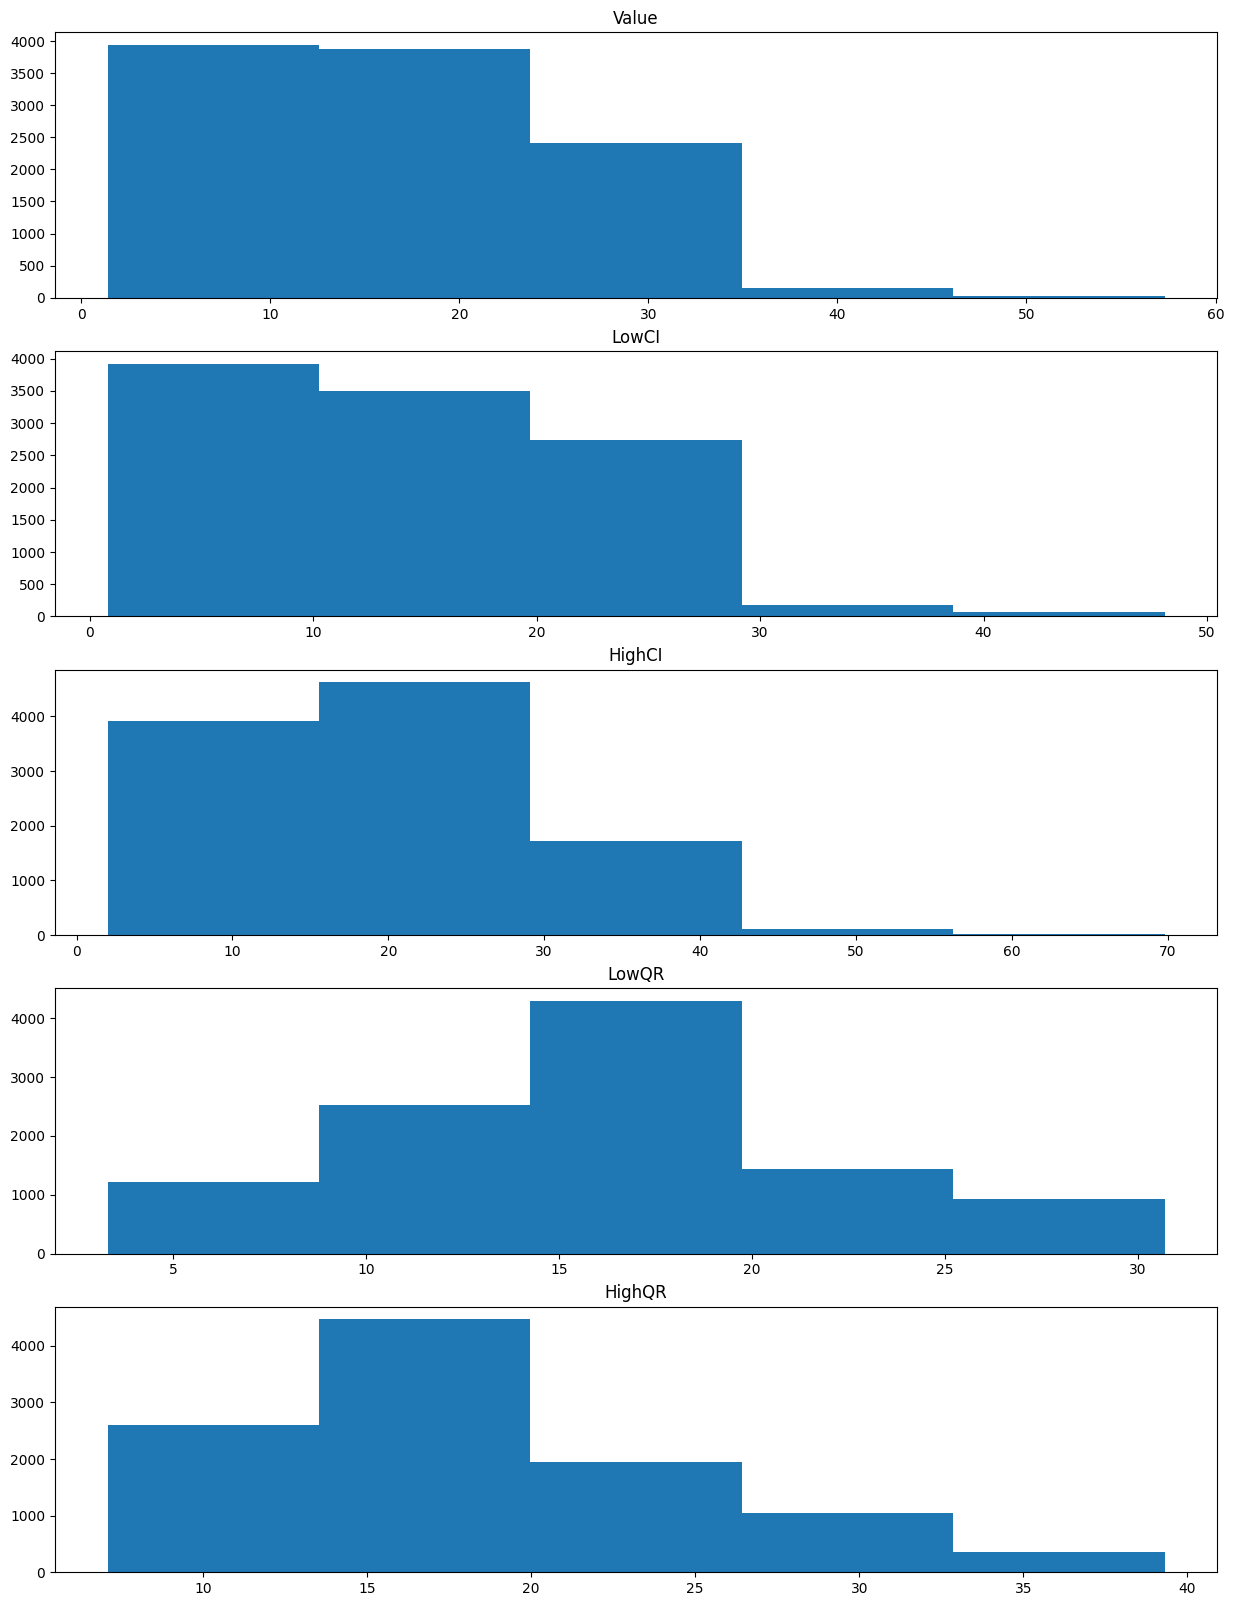

In [124]:
# Histogram of all numeric features
fig, ax = plt.subplots(5, figsize=(15, 20))
ax = ax.flatten()
for i in range(len(ax)):
    x = HealthDataCleaned[numericalFeatures[i]]
    ax[i].hist(x, bins=5)
    ax[i].set_title(numericalFeatures[i])
plt.show()

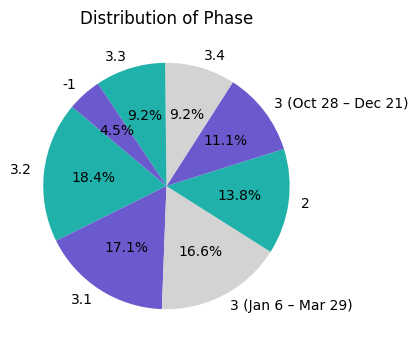

In [125]:
# Single dimension with discrete categories.
gender_counts = HealthDataCleaned['Phase'].value_counts()

# Plot a pie chart
plt.figure(figsize=(4, 4))
gender_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['lightseagreen', 'slateblue', 'lightgray'])
plt.title('Distribution of Phase')
plt.ylabel('')  # Remove the default y-axis label for better appearance
plt.show()

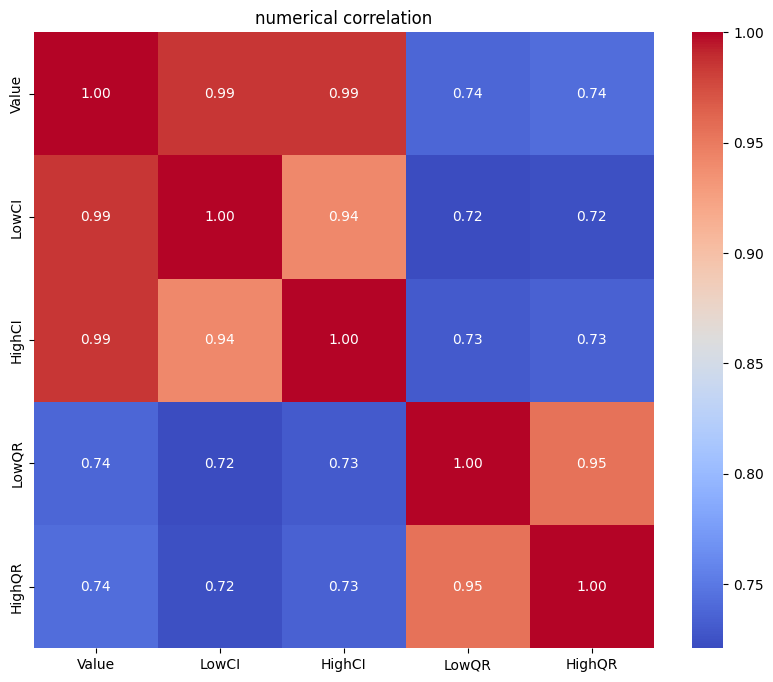

In [126]:
# correlation matrix of all numeric features
plt.figure(figsize=(10, 8))
numerical_corr_matrix = HealthDataCleaned[numericalFeatures].corr()
sns.heatmap(numerical_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("numerical correlation")
plt.show()

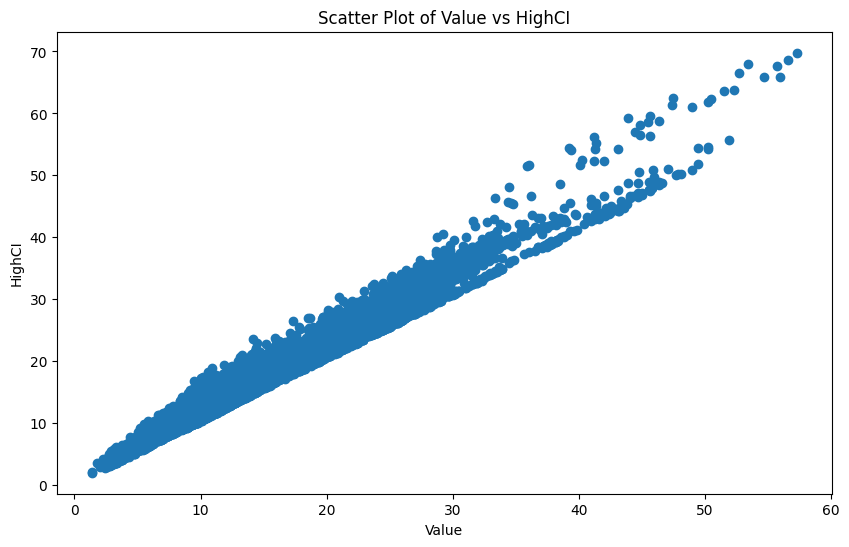

In [127]:
#Scatter plot : Relationship between observations on two continuous dimensions
# Scatter plot for Value vs HighCI
plt.figure(figsize=(10, 6))
plt.scatter(HealthDataCleaned['Value'], HealthDataCleaned['HighCI'])
plt.xlabel('Value')
plt.ylabel('HighCI')
plt.title('Scatter Plot of Value vs HighCI')
plt.show()

In [128]:
HealthDataCleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10402 entries, 0 to 10403
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Value                   10402 non-null  float64
 1   LowCI                   10402 non-null  float64
 2   HighCI                  10402 non-null  float64
 3   LowQR                   10402 non-null  float64
 4   HighQR                  10402 non-null  float64
 5   Group                   10402 non-null  object 
 6   State                   10402 non-null  object 
 7   Phase                   10402 non-null  object 
 8   Time Period             10402 non-null  int64  
 9   Time Period Start Date  10402 non-null  object 
 10  Time Period End Date    10402 non-null  object 
 11  Indicator               10402 non-null  object 
dtypes: float64(5), int64(1), object(6)
memory usage: 1.0+ MB


In [129]:

# Convert to datetime
HealthDataCleaned['Time Period Start Date'] = pd.to_datetime(HealthDataCleaned['Time Period Start Date'])
HealthDataCleaned['Time Period End Date'] = pd.to_datetime(HealthDataCleaned['Time Period End Date'])

# Convert to custom numeric format YYYYMMDD as float
HealthDataCleaned['Start Date Float'] = HealthDataCleaned['Time Period Start Date'].dt.strftime('%Y%m%d').astype(float)
HealthDataCleaned['End Date Float'] = HealthDataCleaned['Time Period End Date'].dt.strftime('%Y%m%d').astype(float)

# Drop the original columns
HealthDataCleaned = HealthDataCleaned.drop(columns=['Time Period Start Date', 'Time Period End Date'])

In [130]:
HealthDataCleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10402 entries, 0 to 10403
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Value             10402 non-null  float64
 1   LowCI             10402 non-null  float64
 2   HighCI            10402 non-null  float64
 3   LowQR             10402 non-null  float64
 4   HighQR            10402 non-null  float64
 5   Group             10402 non-null  object 
 6   State             10402 non-null  object 
 7   Phase             10402 non-null  object 
 8   Time Period       10402 non-null  int64  
 9   Indicator         10402 non-null  object 
 10  Start Date Float  10402 non-null  float64
 11  End Date Float    10402 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.0+ MB


In [131]:
HealthDataCleaned

,Value,LowCI,HighCI,LowQR,HighQR,Group,State,Phase,Time Period,Indicator,Start Date Float,End Date Float
0,19.4,19.0,19.8,15.570817,19.090103,National Estimate,United States,2,13,Took Prescription Medication for Mental Health...,20200819.0,20200831.0
1,18.7,17.2,20.3,15.570817,19.090103,By Age,United States,2,13,Took Prescription Medication for Mental Health...,20200819.0,20200831.0
2,18.3,17.3,19.2,15.570817,19.090103,By Age,United States,2,13,Took Prescription Medication for Mental Health...,20200819.0,20200831.0
3,20.4,19.5,21.3,15.570817,19.090103,By Age,United States,2,13,Took Prescription Medication for Mental Health...,20200819.0,20200831.0
4,21.2,20.2,22.2,15.570817,19.090103,By Age,United States,2,13,Took Prescription Medication for Mental Health...,20200819.0,20200831.0
...,...,...,...,...,...,...,...,...,...,...,...,...
10399,10.1,7.1,13.8,9.600000,11.300000,By State,Virginia,3.4,45,Needed Counseling or Therapy But Did Not Get I...,20220427.0,20220509.0
10400,14.8,12.5,17.4,13.000000,20.800000,By State,Washington,3.4,45,Needed Counseling or Therapy But Did Not Get I...,20220427.0,20220509.0
10401,9.8,6.6,13.8,9.600000,11.300000,By State,West Virginia,3.4,45,Needed Counseling or Therapy But Did Not Get I...,20220427.0,20220509.0
10402,11.6,8.5,15.3,11.400000,12.900000,By State,Wisconsin,3.4,45,Needed Counseling or Therapy But Did Not Get I...,20220427.0,20220509.0


In [132]:
categoricalFeatures=['Group','State','Phase']
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)
encoded_data = encoder.fit_transform(HealthDataCleaned[categoricalFeatures])
encoded_df = pd.DataFrame()
for i, col in enumerate(encoder.get_feature_names_out()):
    encoded_df[col] = encoded_data[:, i]
encoded_df

,Group_By Age,Group_By Disability status,Group_By Education,Group_By Gender identity,Group_By Presence of Symptoms of Anxiety/Depression,Group_By Race/Hispanic ethnicity,Group_By Sex,Group_By Sexual orientation,Group_By State,Group_National Estimate,...,State_Wisconsin,State_Wyoming,Phase_-1,Phase_2,Phase_3 (Jan 6 – Mar 29),Phase_3 (Oct 28 – Dec 21),Phase_3.1,Phase_3.2,Phase_3.3,Phase_3.4
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10397,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10398,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10399,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10400,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [133]:
encoded_df.shape

(10402, 70)

In [134]:
HealthDataCleaned= HealthDataCleaned.drop(['Group', 'State','Phase'], axis=1)

In [135]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
HealthDataCleaned['Indicator'] = le.fit_transform(HealthDataCleaned['Indicator'])


In [136]:
HealthDataCleaned.shape

(10402, 9)

In [137]:
HealthTransformed = pd.concat([encoded_df.reset_index(), HealthDataCleaned.reset_index()], axis=1)

In [138]:
HealthTransformed.drop(columns=['index'], inplace=True)


In [139]:
HealthTransformed.head(5)

,Group_By Age,Group_By Disability status,Group_By Education,Group_By Gender identity,Group_By Presence of Symptoms of Anxiety/Depression,Group_By Race/Hispanic ethnicity,Group_By Sex,Group_By Sexual orientation,Group_By State,Group_National Estimate,...,Phase_3.4,Value,LowCI,HighCI,LowQR,HighQR,Time Period,Indicator,Start Date Float,End Date Float
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,19.4,19.0,19.8,15.570817,19.090103,13,3,20200819.0,20200831.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,18.7,17.2,20.3,15.570817,19.090103,13,3,20200819.0,20200831.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,18.3,17.3,19.2,15.570817,19.090103,13,3,20200819.0,20200831.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,20.4,19.5,21.3,15.570817,19.090103,13,3,20200819.0,20200831.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,21.2,20.2,22.2,15.570817,19.090103,13,3,20200819.0,20200831.0


In [140]:
# Checking for imbalanced data
HealthTransformed['Indicator'].value_counts()

Indicator
3    2601
1    2601
0    2601
2    2599
Name: count, dtype: int64

In [141]:
# Calculate percentages
class_percentages = HealthTransformed['Indicator'].value_counts(normalize=True) * 100
print("\nClass Percentages:")
print(class_percentages)


Class Percentages:
Indicator
3    25.004807
1    25.004807
0    25.004807
2    24.985580
Name: proportion, dtype: float64


In [142]:
X = HealthTransformed.drop('Indicator', axis=1)
# so for training your X is everything minus your last column as it is your label/output
y = HealthTransformed['Indicator']
# this is the label/output

In [143]:
forest = RandomForestClassifier(n_estimators=250, random_state=0)
forest.fit(X, y)

RandomForestClassifier(n_estimators=250, random_state=0)

In [144]:
feature_importances = forest.feature_importances_
important_features = np.argsort(feature_importances)[::-1]

In [145]:
top_features = important_features[:10] 
selected_features = X.iloc[:, top_features]
selected_features

,LowCI,Value,HighCI,HighQR,LowQR,Start Date Float,Time Period,End Date Float,Group_By Age,Group_By Presence of Symptoms of Anxiety/Depression
0,19.0,19.4,19.8,19.090103,15.570817,20200819.0,13,20200831.0,0.0,0.0
1,17.2,18.7,20.3,19.090103,15.570817,20200819.0,13,20200831.0,1.0,0.0
2,17.3,18.3,19.2,19.090103,15.570817,20200819.0,13,20200831.0,1.0,0.0
3,19.5,20.4,21.3,19.090103,15.570817,20200819.0,13,20200831.0,1.0,0.0
4,20.2,21.2,22.2,19.090103,15.570817,20200819.0,13,20200831.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
10397,7.1,10.1,13.8,11.300000,9.600000,20220427.0,45,20220509.0,0.0,0.0
10398,12.5,14.8,17.4,20.800000,13.000000,20220427.0,45,20220509.0,0.0,0.0
10399,6.6,9.8,13.8,11.300000,9.600000,20220427.0,45,20220509.0,0.0,0.0
10400,8.5,11.6,15.3,12.900000,11.400000,20220427.0,45,20220509.0,0.0,0.0


In [146]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.2, random_state=1)

In [147]:
#  Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
# Predict
y_pred = rf.predict(X_test)

# Evaluate
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Random Forest Accuracy: 0.8082652570879385
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.72      0.75       506
           1       0.75      0.79      0.77       541
           2       0.89      0.87      0.88       498
           3       0.81      0.85      0.83       536

    accuracy                           0.81      2081
   macro avg       0.81      0.81      0.81      2081
weighted avg       0.81      0.81      0.81      2081



In [148]:
# Gradient Boosting (XGBoost)
xgb = XGBClassifier(eval_metric='mlogloss', random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

# Evaluate
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))


XGBoost Accuracy: 0.8625660740028832
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.81      0.83       506
           1       0.81      0.87      0.84       541
           2       0.93      0.87      0.90       498
           3       0.87      0.90      0.88       536

    accuracy                           0.86      2081
   macro avg       0.87      0.86      0.86      2081
weighted avg       0.86      0.86      0.86      2081

